In [84]:
import pandas as pd
import os

In [85]:
df = pd.read_excel('Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [87]:
df.shape

(30000, 25)

In [88]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

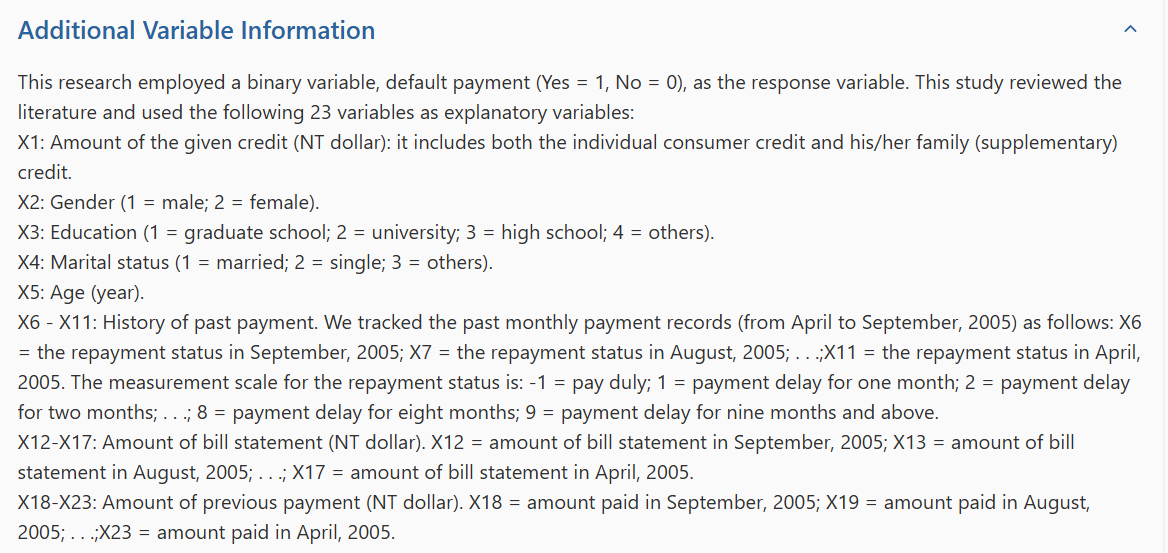

# Data Exploration

- Number of columns = 25
- Number of rows = 30000
- No missing data
- There are 2 object columns (but one of them is an ID)
    - PAY_1 is marked as object but it should be numeric coumn since it represents history of past payments as a number.
        - <i>There is a Not Available value which is not defined in the data dictionary.</i>
- There are 23 numeric columns
- default payment next month is a target variable based on problem statement
- That means there are 23 feature variables (excluding the ID column)

## ID Analysis

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [ ]:
# Explore ID Column

df['ID'].nunique()

# unique count of ID is 29687 while total rows are 30000. This means the column is not unique as the data dictionary suggests.
# Lets try to see which IDs are duplicated.

29687

In [53]:
id_counts = df['ID'].value_counts()
id_counts.value_counts()

# There are 313 ID which are duplicated. Lets 

count
1    29374
2      313
Name: count, dtype: int64

In [54]:
# We will now drop these duplicate ID rows only and only if all other columns match in values.

df.drop_duplicates(inplace = True)

In [58]:
# lets recheck if the ID column has duplicates

df['ID'].value_counts().value_counts()

# Same ID rows have different values in other column, so lets check again

count
1    29374
2      313
Name: count, dtype: int64

In [66]:
# This time lets check the values in the rows for some of the duplicated IDs

dup_id = list(id_counts[id_counts.values == 2].index)

In [73]:
df[df['ID'].isin(dup_id)].sort_values(['ID','LIMIT_BAL']).head(6)

# Every duplicate ID has 1 row which has zero value. Lets drop first row for each duplicate ID

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
15863,01355f46-3f0b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15763,01355f46-3f0b,100000,2,2,2,23,Not available,2,2,2,...,96332,97560,95885,5000,4300,3600,3700,0,7300,0
21972,0170086d-7472,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21872,0170086d-7472,100000,2,1,1,25,0,0,-1,0,...,52079,40183,35796,28,103350,1722,1100,1300,2000,0
3384,02e41927-a6df,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3284,02e41927-a6df,60000,2,2,2,21,0,0,0,0,...,25475,26010,26183,1859,1410,910,939,1000,1000,0


In [74]:
df_zero_mask = df == 0

In [76]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [78]:
sum(feature_zero_mask)

315

In [79]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [80]:
df_clean_1['ID'].value_counts()

ID
798fc410-45c1    1
8a8c8f3b-8eb4    1
85698822-43f5    1
0737c11b-be42    1
3b7f77cc-dbc0    1
                ..
ecff42d0-bdc6    1
99d1fa0e-222b    1
95cdd3e7-4f24    1
00d03f02-04cd    1
15d69f9f-5ad3    1
Name: count, Length: 29685, dtype: int64

In [82]:
df_clean_1.shape

(29685, 25)

In [83]:
# lets save the cleaned data for futher use

df_clean_1.to_csv('Data/cleaned_credit_card_data.csv', index=False)

## Continue with rest of the features and responses analysis

In [107]:
# Lets load the cleaned data first before proceeding further wiht analysis

df_clean_1 = pd.read_csv('Data/cleaned_credit_card_data.csv')
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [108]:
df_clean_1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [109]:
# Lets look at PAY_1 column, since it is supposed to be a numeric column but shows up as an object

df_clean_1['PAY_1'].value_counts().sort_index()

# There are 2 problems here:
# 1. The is a "Not available" value which is not a number
# 2. There are some values which are not mentioned in the data dictionary like 0, and -2

PAY_1
-1                5047
-2                2476
0                13087
1                 3261
2                 2378
3                  292
4                   63
5                   23
6                   11
7                    9
8                   17
Not available     3021
Name: count, dtype: int64

In [110]:
# Lets remove Not available value from the dataframe

df_clean_2 = df_clean_1[df_clean_1['PAY_1'] != 'Not available'].copy()

In [115]:
# Lets also convert PAY_1 to numeric type

df_clean_2['PAY_1'] = pd.to_numeric(df_clean_2['PAY_1'])

df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


In [116]:
df_clean_2.shape

(26664, 25)

In [90]:
df['EDUCATION'].value_counts()

# There are 7 unique values in EDUCATION. Based on data dictionary, there must be only 4 unique values.
# 1. Graduate school
# 2. University
# 3. High school
# 4. Others
# 

EDUCATION
2    13884
1    10474
3     4867
0      329
5      275
4      122
6       49
Name: count, dtype: int64

In [91]:
df.loc[df['EDUCATION'].isin([0,5,6]),'EDUCATION'].value_counts()

EDUCATION
0    329
5    275
6     49
Name: count, dtype: int64